In [1]:
import pandas as pd

df = pd.read_csv("../running_log.txt", names = ["Problem Size", "SAT with heuristic", "Naive SAT", "Greedy Method"])
df

,Problem Size,SAT with heuristic,Naive SAT,Greedy Method
0,10,Ok(2.569985ms),Ok(27ns),Ok(1.044503ms)
1,10,Ok(2.465534ms),Ok(28ns),Ok(1.000601ms)
2,10,Ok(2.592698ms),Ok(29ns),Ok(1.027408ms)
3,10,Ok(2.575809ms),Ok(29ns),Ok(1.003065ms)
4,10,Ok(2.631835ms),Ok(29ns),Ok(1.017832ms)
...,...,...,...,...
395,40,Ok(206.722969ms),Ok(31ns),Ok(83.67582ms)
396,40,Ok(218.595484ms),Ok(32ns),Ok(86.431102ms)
397,40,Ok(221.025909ms),Ok(31ns),Ok(84.103881ms)
398,40,Ok(205.69198ms),Ok(30ns),Ok(84.107113ms)


In [2]:
import math

def get_time_in_seconds(input: str):
    if type(input) is not str:
        return input
    start = input.find("(")
    if start == -1:
        return input
    end = input.find(")")
    if input[start:end].endswith("ms"):
        multiplier = 0.001
        newend = end-2
    elif input[start:end].endswith("ns"):
        multiplier = 1e-9
        newend = end - 2
    elif input[start:end].endswith("µs"):
        multiplier = 1e-6
        newend = end - 2
    elif input[start:end].endswith("s"):
        multiplier = 1
        newend = end - 1
    try:
        result = float(input[start+1:newend]) * multiplier
        if result < 1e-6:
            return 10000
        return result
    except:
        return input

cleaned_data = df.applymap(get_time_in_seconds)

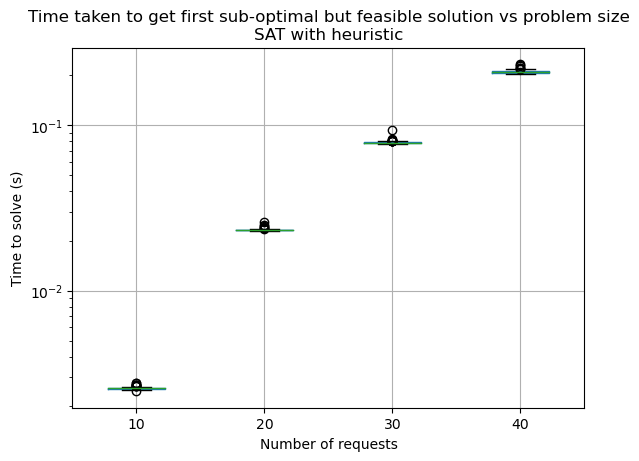

In [4]:
import matplotlib.pyplot as plt


plot = cleaned_data.boxplot(column=["SAT with heuristic"], by="Problem Size")


plot.set_yscale('log')
plot.set_ylabel('Time to solve (s)')
plot.set_xlabel('Number of requests')

plt.suptitle("Time taken to get first sub-optimal but feasible solution vs problem size")
plt.show()